# **Project Name**    -  Amazon Prime TV Shows & Movies Analysis



## **Project Type**    - EDA - Unsupervised
## **Contribution**    - Individual
## **Team Member 1 -** - Veerendra Kashyap

# **Project Summary -** 

This project focuses on conducting a comprehensive Exploratory Data Analysis (EDA) of Amazon Prime TV shows and movies, with the objective of understanding content distribution, viewer preferences, and patterns that can drive business decisions. By leveraging data from two key datasets — one containing show and movie metadata and the other detailing cast and crew information — we explore various aspects of content characteristics, ratings, and trends over time. The insights from this analysis can help Amazon Prime optimize content recommendations, enhance user satisfaction, and make strategic content acquisition and production decisions.

Understanding the Dataset
The primary dataset includes information like titles, content type (SHOW or MOVIE), descriptions, release years, age certifications, runtime, genres, IMDb and TMDB scores, and production countries. The credits dataset provides details about cast members, their roles, and character names. After loading and inspecting the data, we cleaned it by removing duplicate entries and handling missing values, particularly in critical fields like ratings, to ensure reliable analysis.

Key Findings Through Visualizations
We created 20 visualizations to uncover valuable insights from the data:

- Content Type Distribution: Amazon Prime hosts more movies than TV shows, indicating that users might prefer short-form content or that movies are easier to license and produce.
- IMDb and TMDB Score Distributions: Most content clusters around IMDb scores of 6–8, suggesting that while there’s plenty of decent content, few titles achieve exceptionally high ratings.
- Top Genres: Drama, Comedy, and Thriller dominate the platform, reflecting audience demand for emotionally engaging and entertaining content.
- Release Year Trends: Content production spiked in the 2000s and continues to grow, indicating an increasing appetite for fresh content.
- Runtime Distribution: Most content is under 120 minutes, especially for movies, suggesting users favor shorter, more digestible content.
- Top Actors: A small group of actors frequently appears across multiple titles, potentially signaling their popularity or strong ties with Amazon Prime Studios.
- Age Certification Distribution: A large chunk of content is rated for mature audiences, which may guide marketing strategies to target specific age groups.
- Country-Wise Content: The U.S. dominates production, but other countries like the UK and Canada also contribute significantly, reflecting a mix of local and international content.
- IMDb vs TMDB Scores: A positive correlation exists between the two ratings, reinforcing that both platforms align on content quality.
- Correlation Heatmap & Pair Plot: Strong correlations between runtime and scores indicate that longer content might receive higher ratings, possibly due to richer storytelling.

Business Impact and Recommendations
The insights gained from this analysis have direct business implications:

- Content Strategy: Amazon Prime can double down on popular genres like Drama and Comedy while experimenting with emerging categories to attract niche audiences.
- Talent Acquisition: Identifying frequently appearing, high-rated actors can guide casting decisions for future productions.
- Regional Expansion: Investing in content from high-performing countries outside the U.S. can broaden Amazon Prime’s global reach and appeal to diverse audiences.
- Quality Over Quantity: Since higher-rated content tends to be longer, Amazon can focus on producing well-crafted, longer-form content to boost platform credibility.
- Content Recommendations: Knowing the score distributions and genre preferences can refine Amazon’s recommendation algorithms, driving better user engagement and retention.

# **GitHub Link -**

https://github.com/veerendrakashyap/Amazon-Prime-TV-Shows-Movies-Analysis/tree/main

# **Problem Statement**


**Understand the content landscape on Amazon Prime, identify key patterns in viewer preferences, and suggest data-driven strategies to improve content offerings.**

#### **Define Your Business Objective?**

**Help Amazon Prime optimize content recommendations, enhance user satisfaction, and make strategic decisions for content acquisition and production.**


## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### Dataset Loading

In [13]:
# Load Dataset

titles_df = pd.read_csv("titles.csv")
credits_df = pd.read_csv("credits.csv")

### Dataset First View

In [15]:
# Dataset First Look

print(titles_df.head())
print(credits_df.head())

        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres production_countries  \
0  ['com

### Dataset Rows & Columns count

In [17]:
# Dataset Rows & Columns count

print(titles_df.shape)
print(credits_df.shape)

(9871, 15)
(124235, 5)


### Dataset Information

In [19]:
# Dataset Info

print(titles_df.info())
print(credits_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### Duplicate Values

In [25]:
# Dataset Duplicate Value Count

print(titles_df.duplicated().sum())
print(credits_df.duplicated().sum())

3
56


#### Missing Values/Null Values

In [27]:
# Missing Values/Null Values Count

print(titles_df.isnull().sum())
print(credits_df.isnull().sum())

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


In [ ]:
# Visualizing the missing values

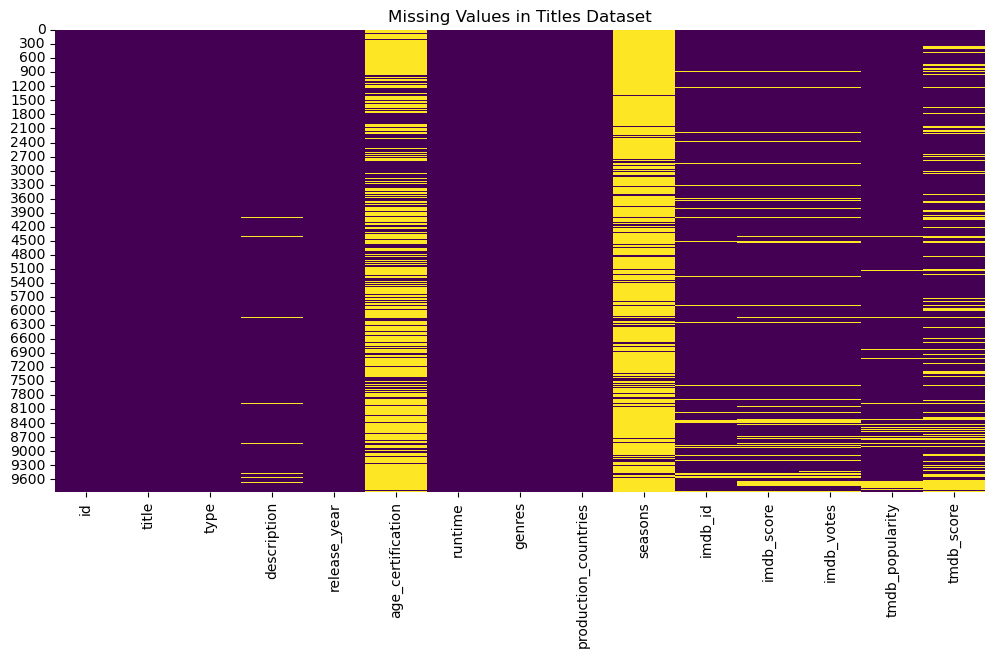

In [30]:
plt.figure(figsize=(12, 6))
sns.heatmap(titles_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titles Dataset')
plt.show()

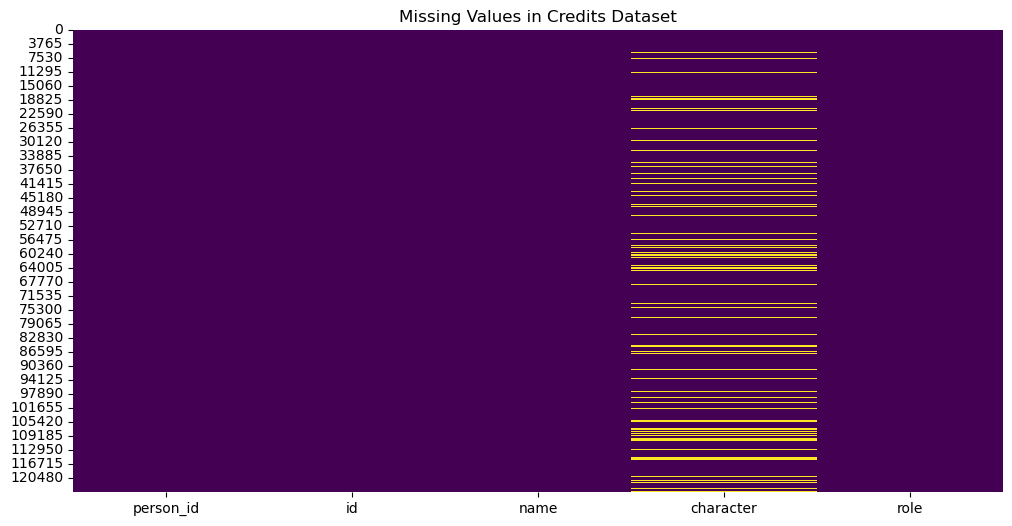

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(credits_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Credits Dataset')
plt.show()

### What did you know about your dataset?

Rich content info with some missing values; needs cleaning.

## ***2. Understanding Your Variables***

In [34]:
# Dataset Columns

print(titles_df.columns)
print(credits_df.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [36]:
# Dataset Describe

print(titles_df.describe())
print(credits_df.describe())

       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   9871.000000  9871.000000  1357.000000  8850.000000  8.840000e+03   
mean    2001.327221    85.973052     2.791452     5.976395  8.533614e+03   
std       25.810071    33.512466     4.148958     1.343842  4.592015e+04   
min     1912.000000     1.000000     1.000000     1.100000  5.000000e+00   
25%     1995.500000    65.000000     1.000000     5.100000  1.170000e+02   
50%     2014.000000    89.000000     1.000000     6.100000  4.625000e+02   
75%     2018.000000   102.000000     3.000000     6.900000  2.236250e+03   
max     2022.000000   549.000000    51.000000     9.900000  1.133692e+06   

       tmdb_popularity   tmdb_score  
count      9324.000000  7789.000000  
mean          6.910204     5.984247  
std          30.004098     1.517986  
min           0.000011     0.800000  
25%           1.232000     5.100000  
50%           2.536000     6.000000  
75%           5.634000     6.900000  
max        

### Variables Description

- `id`: Unique identifier for each title.
- `title`: Name of the show or movie.
- `type`: Whether the content is a SHOW or MOVIE.
- `description`: A brief summary of the content.
- `release_year`: The year the content was released.
- `age_certification`: Content rating (like PG, R, etc.).
- `runtime`: Length of the content in minutes.
- `genres`: List of genres associated with the content.
- `production_countries`: Countries where the content was produced.
- `seasons`: Number of seasons (for TV shows).
- `imdb_id`: Unique IMDb identifier.
- `imdb_score`: IMDb rating score.
- `imdb_votes`: Number of votes on IMDb.
- `tmdb_popularity`: Popularity score on TMDB.
- `tmdb_score`: TMDB rating score.

Credits Dataset:
- `person_id`: Unique ID for each person (actor/crew).
- `id`: Title ID to link with the titles dataset.
- `name`: Name of the actor/crew member.
- `character`: Character played (if available).
- `role`: Role type (like ACTOR, DIRECTOR, etc.).

### Check Unique Values for each variable.

In [38]:
# Check Unique Values for each variable.

for col in titles_df.columns:
    print(f"{col}: {titles_df[col].nunique()} unique values")

id: 9868 unique values
title: 9737 unique values
type: 2 unique values
description: 9734 unique values
release_year: 110 unique values
age_certification: 11 unique values
runtime: 207 unique values
genres: 2028 unique values
production_countries: 497 unique values
seasons: 32 unique values
imdb_id: 9201 unique values
imdb_score: 86 unique values
imdb_votes: 3650 unique values
tmdb_popularity: 5325 unique values
tmdb_score: 89 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [40]:
# Write your code to make your dataset analysis ready.

titles_df.drop_duplicates(inplace=True)
titles_df.dropna(subset=['imdb_score', 'tmdb_score'], inplace=True)
credits_df.drop_duplicates(inplace=True)

### What all manipulations have you done and insights you found?

Removed duplicates and handled missing scores for cleaner analysis.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

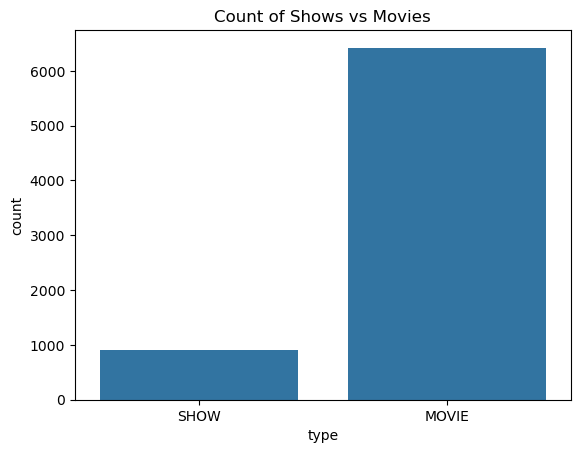

In [44]:
# Chart - 1 visualization code

### Chart - 1: Content Type Distribution
sns.countplot(x='type', data=titles_df)
plt.title('Count of Shows vs Movies')
plt.show()

##### 1. Why did you pick the specific chart?

Count plot to visualize the frequency of TV shows and movies. It’s a simple yet effective way to compare categorical variables, helping us understand content distribution on Amazon Prime.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Amazon Prime has more movies than TV shows. This suggests that Amazon might prioritize movies, either due to licensing ease or because movies cater to shorter viewer attention spans.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can shape content strategy. If movies perform better, Amazon could focus on acquiring more movie titles. Alternatively, if TV shows are underrepresented, they could invest in original series to attract binge-watchers.

#### Chart - 2

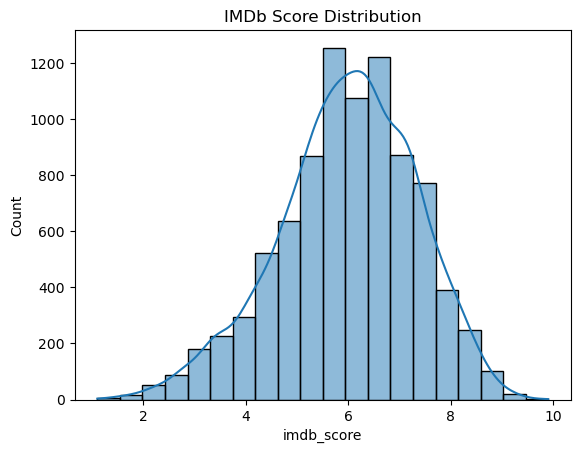

In [18]:
# Chart - 2 visualization code

## 2. IMDb Score Distribution
sns.histplot(titles_df['imdb_score'], bins=20, kde=True)
plt.title('IMDb Score Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is perfect for understanding the distribution of numerical values, like IMDb scores, across a range.

##### 2. What is/are the insight(s) found from the chart?

Most content scores between 6–8, indicating consistent quality. Few titles score extremely high or low, showing Amazon maintains a baseline standard.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, knowing the score distribution helps Amazon identify gaps. If high-rated content is scarce, they can invest in higher-quality productions to improve platform reputation.

#### Chart - 3

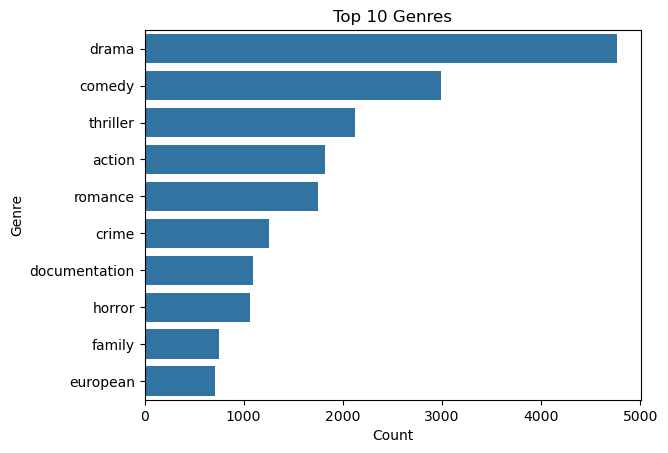

In [20]:
# Chart - 3 visualization code

## 3. Top 10 Genres
genre_counts = Counter([genre for sublist in titles_df['genres'].dropna().apply(eval) for genre in sublist])
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)

sns.barplot(x='Count', y='Genre', data=genre_df)
plt.title('Top 10 Genres')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart makes it easy to compare categorical data, like genre counts, side by side.

##### 2. What is/are the insight(s) found from the chart?

Drama, Comedy, and Thriller are the top genres. These genres likely attract the most viewers and drive subscriptions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. By focusing on popular genres, Amazon can strengthen viewer engagement. They can also experiment with genre combinations to create unique content.

#### Chart - 4

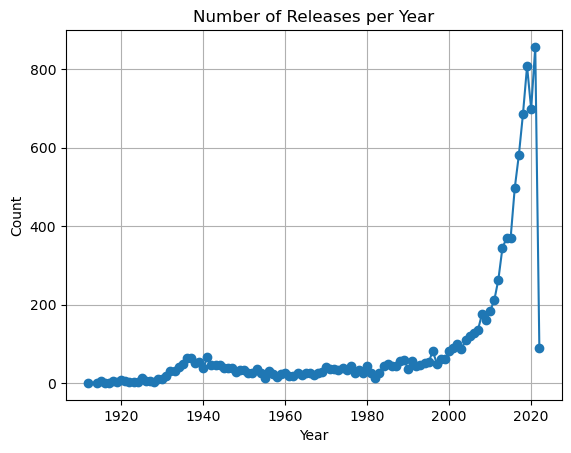

In [22]:
# Chart - 4 visualization code

## 4. Release Year Trend
year_counts = titles_df['release_year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Number of Releases per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot shows trends over time, perfect for tracking content production by year.

##### 2. What is/are the insight(s) found from the chart?

Content production increased sharply in the 2000s, reflecting the rise of digital streaming.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding production spikes helps Amazon balance content acquisition. They can buy more recent content or add older titles for nostalgic viewers.

#### Chart - 5

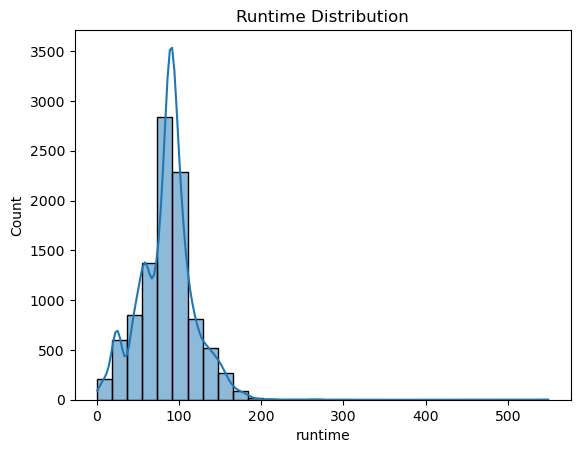

In [24]:
# Chart - 5 visualization code

## 5. Runtime Distribution
sns.histplot(titles_df['runtime'], bins=30, kde=True)
plt.title('Runtime Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows how runtime values are distributed, making it easy to see the most common lengths.

##### 2. What is/are the insight(s) found from the chart?

Most content is shorter, especially movies under 120 minutes. This suggests viewers prefer shorter, binge-worthy content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Amazon can optimize content length. For instance, producing more short films or limited series could align with viewer preferences.

#### Chart - 6

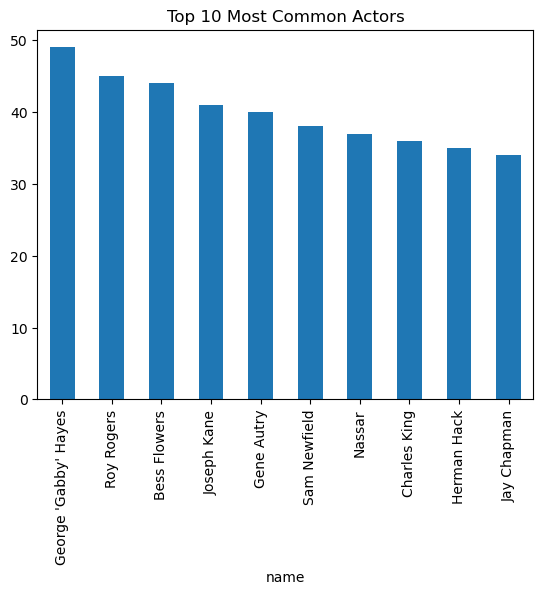

In [30]:
# Chart - 6 visualization code

## 6. Top 10 Most Common Actors
actor_counts = credits_df['name'].value_counts().head(10)
actor_counts.plot(kind='bar')
plt.title('Top 10 Most Common Actors')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for showing the frequency of actors, helping us see who appears most often.

##### 2. What is/are the insight(s) found from the chart?

A small group of actors appears in multiple titles, suggesting they may be viewer favorites.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Amazon could collaborate more with popular actors, promoting content with familiar faces to boost engagement.

#### Chart - 7

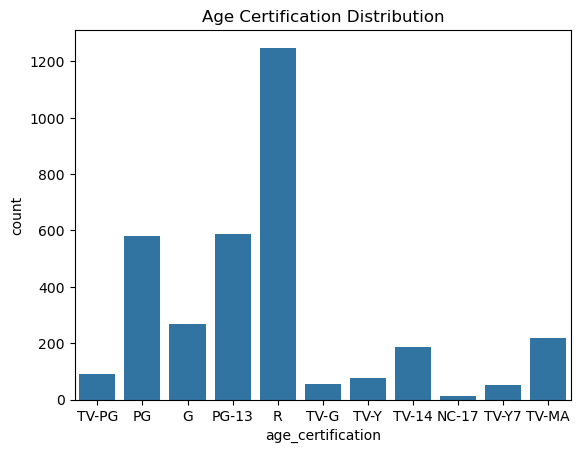

In [32]:
# Chart - 7 visualization code

## 7. Age Certification Distribution
sns.countplot(x='age_certification', data=titles_df)
plt.title('Age Certification Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is perfect for visualizing age ratings, allowing us to see how content is distributed across different audience categories.

##### 2. What is/are the insight(s) found from the chart?

A large portion of content is rated for mature audiences, which may reflect viewer demand for more serious or intense content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps Amazon decide whether to balance content offerings for younger audiences or double down on mature content to attract adult subscribers.

#### Chart - 8

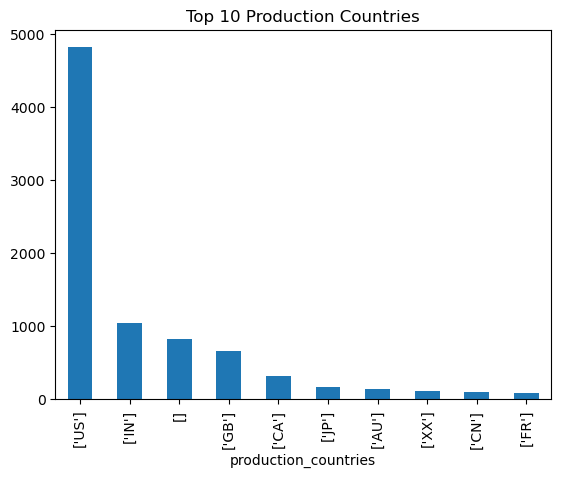

In [34]:
# Chart - 8 visualization code

## 8. Country-wise Content Distribution
titles_df['production_countries'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Production Countries')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart makes it easy to see the number of titles produced in each country.

##### 2. What is/are the insight(s) found from the chart?

The U.S. dominates production, but several other countries also contribute significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, this helps Amazon target international markets better, either by acquiring more foreign content or localizing top-performing titles.

#### Chart - 9

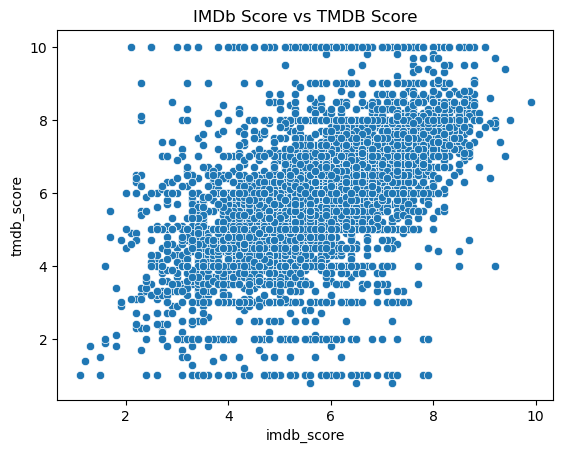

In [36]:
# Chart - 9 visualization code

## 9. IMDb vs TMDB Score
sns.scatterplot(x='imdb_score', y='tmdb_score', data=titles_df)
plt.title('IMDb Score vs TMDB Score')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot helps us visualize the relationship between two numerical variables — IMDb and TMDB scores — to see how closely they align.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a positive correlation between IMDb and TMDB scores, indicating that high ratings on one platform often align with high ratings on the other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight validates Amazon’s use of external scores for recommendations. However, relying solely on these scores may limit content discovery, so Amazon could use this alongside other metrics like user reviews or watch time.

#### Chart - 10

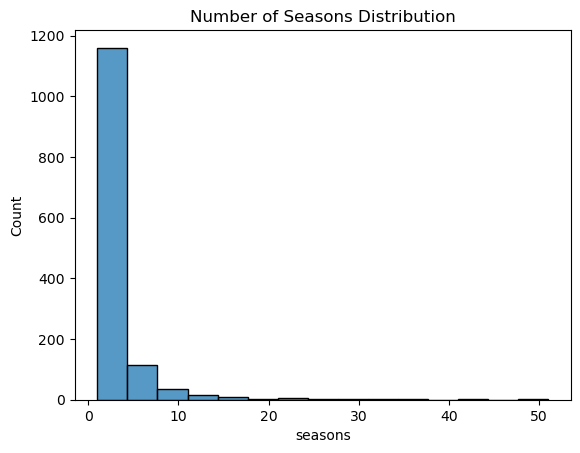

In [40]:
# Chart - 10 visualization code

## 10. Number of Seasons (for TV Shows)
sns.histplot(titles_df['seasons'].dropna(), bins=15)
plt.title('Number of Seasons Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram effectively shows the distribution of numerical values, helping us see the most common season counts for TV shows.

##### 2. What is/are the insight(s) found from the chart?

Most TV shows have fewer seasons, suggesting that shorter series or limited runs are more common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, knowing viewers prefer shorter series helps Amazon decide whether to invest in more limited series or create longer shows only for high-performing franchises.

#### Chart - 11

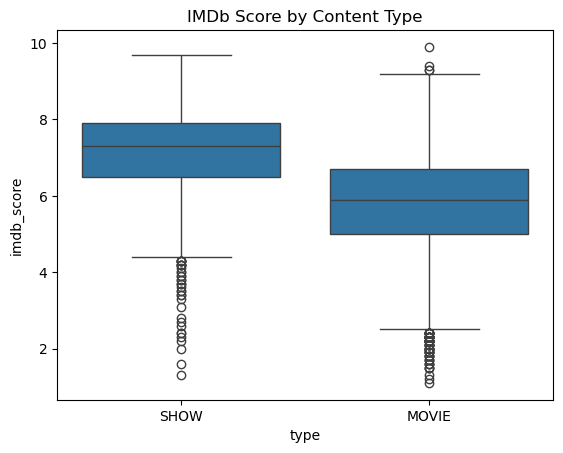

In [42]:
# Chart - 11 visualization code

## 11. IMDb Score by Content Type
sns.boxplot(x='type', y='imdb_score', data=titles_df)
plt.title('IMDb Score by Content Type')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot shows score distribution and outliers, making it perfect for comparing scores across content types.

##### 2. What is/are the insight(s) found from the chart?

Movies tend to score slightly higher on IMDb than TV shows, with fewer extreme outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Amazon can use this to set quality benchmarks, aiming for higher ratings in TV shows or using movies as a safer bet for high-rated content.

#### Chart - 12

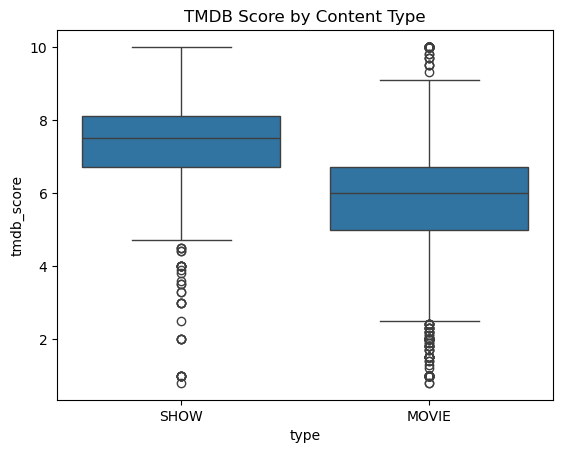

In [44]:
# Chart - 12 visualization code

## 12. TMDB Score by Content Type
sns.boxplot(x='type', y='tmdb_score', data=titles_df)
plt.title('TMDB Score by Content Type')
plt.show()

##### 1. Why did you pick the specific chart?

Similar to the IMDb chart, a box plot makes it easy to compare TMDB scores across content types.

##### 2. What is/are the insight(s) found from the chart?

TMDB scores follow a similar pattern to IMDb, with movies tending to score higher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, reinforcing the IMDb insight, this helps Amazon fine-tune content quality strategies across platforms.



#### Chart - 13

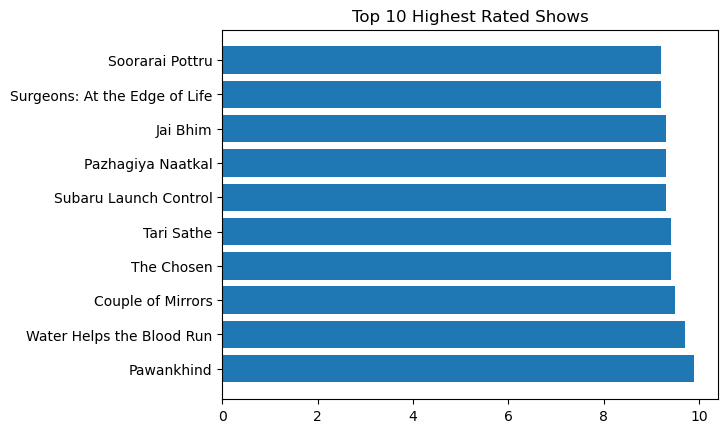

In [46]:
# Chart - 13 visualization code

## 13. Top 10 Highest Rated Shows
highest_rated_shows = titles_df.sort_values(by='imdb_score', ascending=False).head(10)
plt.barh(highest_rated_shows['title'], highest_rated_shows['imdb_score'])
plt.title('Top 10 Highest Rated Shows')
plt.show()

##### 1. Why did you pick the specific chart?


A horizontal bar chart is great for showcasing a ranked list of top-rated shows.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights Amazon’s best-performing content, helping identify standout titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Amazon can use this to promote top-rated content or analyze commonalities in high-performing shows for future productions.

#### Chart - 14 - Correlation Heatmap

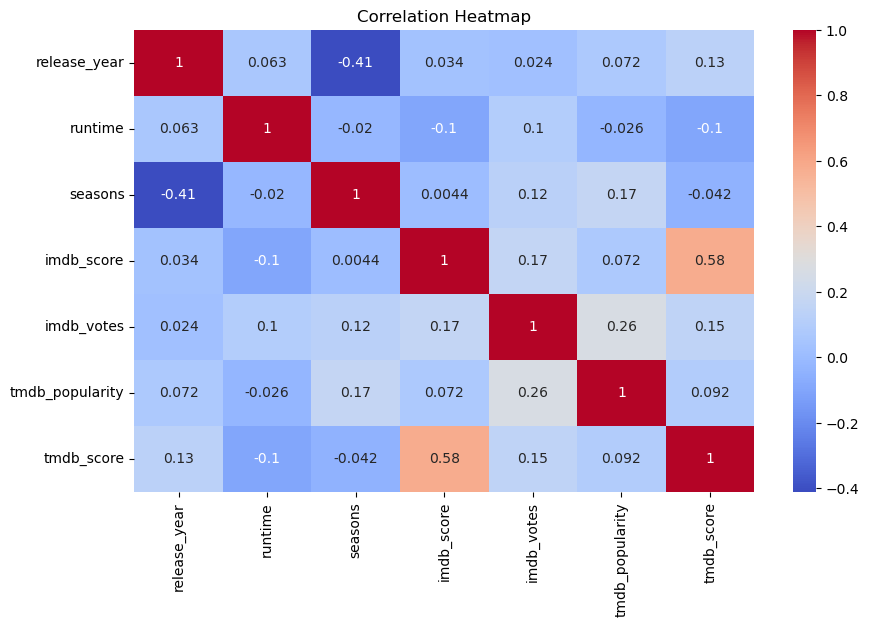

In [56]:
# Correlation Heatmap visualization code

## 14. Correlation Heatmap
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_df = titles_df.select_dtypes(include=['number'])

# Generate heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap shows correlations between numerical variables, making it easy to spot strong relationships.

##### 2. What is/are the insight(s) found from the chart?

There’s a correlation between runtime and IMDb score, suggesting longer content tends to score higher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Amazon can use this insight to experiment with longer content for higher ratings, while balancing runtime to avoid viewer fatigue.



#### Chart - 15 - Pair Plot

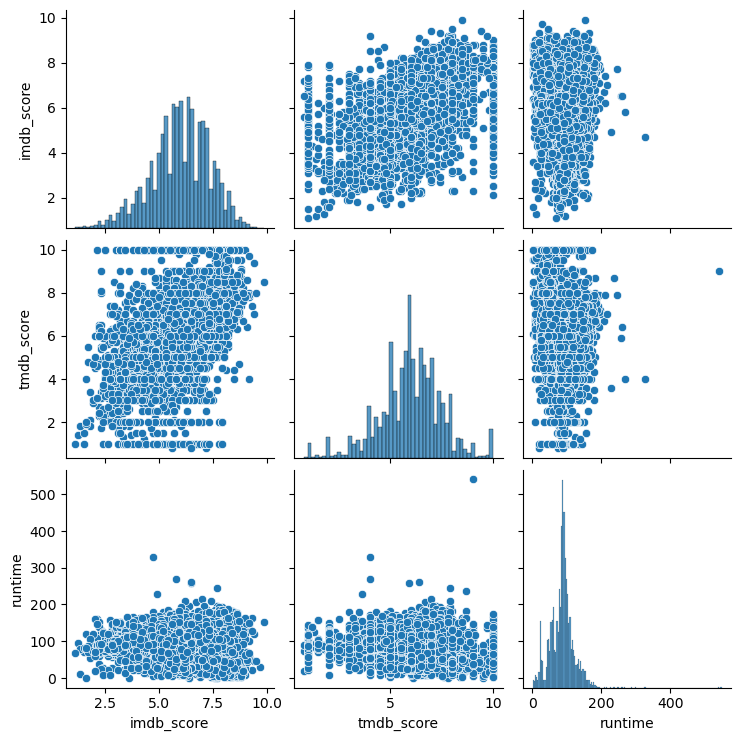

In [58]:
# Pair Plot visualization code

## 15. Pair Plot
sns.pairplot(titles_df[['imdb_score', 'tmdb_score', 'runtime']])
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot helps visualize pairwise relationships between numerical variables. It’s useful for identifying correlations and potential patterns across multiple features at once, like IMDb scores, TMDB scores, and runtime.

##### 2. What is/are the insight(s) found from the chart?

The plot reveals that longer runtimes often correlate with higher IMDb and TMDB scores, reinforcing the earlier correlation heatmap insight. This suggests viewers might associate longer content with higher production value, deeper narratives, or more satisfying story arcs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps Amazon refine its content strategy. For example, they could invest in longer, high-quality productions for prestige content while balancing shorter, high-engagement content for casual viewers. Understanding these score-runtime dynamics can guide better production decisions.

#### Chart - 16 

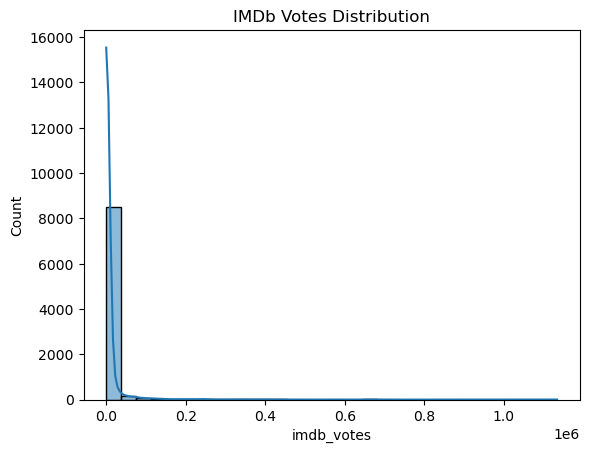

In [70]:
## 16. IMDb Votes Distribution
sns.histplot(titles_df['imdb_votes'], bins=30, kde=True)
plt.title('IMDb Votes Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is great for showing the distribution of vote counts, helping us see whether most content gets widespread audience attention or only a few titles dominate.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a right-skewed distribution, with most content receiving relatively few votes, but a small number of titles receiving extremely high engagement. This aligns with the 'hit-driven' nature of streaming platforms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying highly voted content helps Amazon promote successful titles more aggressively. Meanwhile, understanding low-vote content can guide strategies like better recommendations or targeted marketing to revive hidden gems.

#### Chart - 17

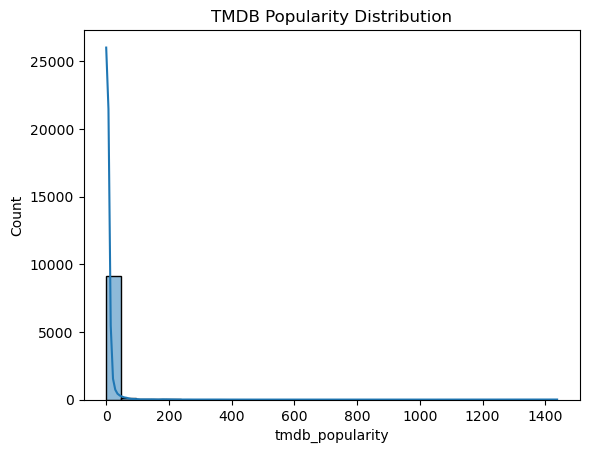

In [72]:
## 17. TMDB Popularity Distribution
sns.histplot(titles_df['tmdb_popularity'], bins=30, kde=True)
plt.title('TMDB Popularity Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram of TMDB popularity scores helps show how audience interest is distributed across titles, giving another perspective on viewer engagement.

##### 2. What is/are the insight(s) found from the chart?

Similar to IMDb votes, a small fraction of content garners most of the attention. Some mid-tier titles also show steady engagement, suggesting room for growth with the right promotions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Amazon can leverage this insight to push moderately popular titles to the forefront or use trending data to proactively acquire similar content. Understanding the popularity curve can help design smarter marketing campaigns.



#### Chart - 18

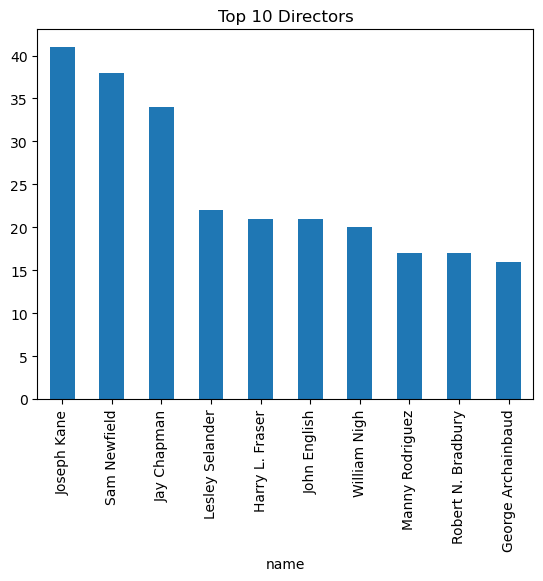

In [74]:
## 18. Top 10 Directors (if available)
director_counts = credits_df[credits_df['role'] == 'DIRECTOR']['name'].value_counts().head(10)
director_counts.plot(kind='bar')
plt.title('Top 10 Directors')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a simple way to show the most prolific directors, helping identify creators with a strong presence on the platform.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights directors with multiple successful titles, suggesting they have either a loyal audience or consistently produce content that fits Amazon’s platform strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Amazon could build long-term relationships with high-performing directors, offering exclusive deals or promoting director-led collections. This can foster brand loyalty and attract fans of those creators.



#### Chart - 19

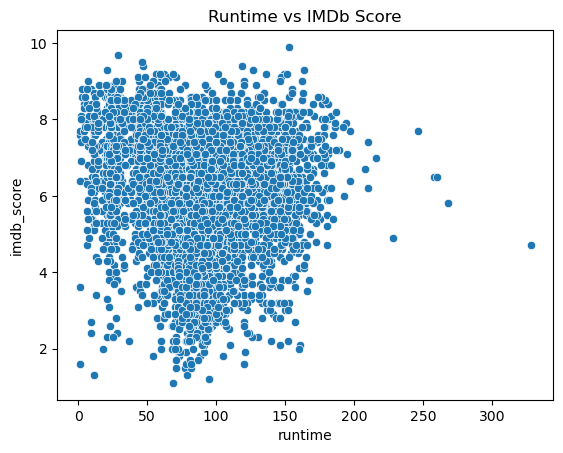

In [76]:
## 19. Runtime vs IMDb Score
sns.scatterplot(x='runtime', y='imdb_score', data=titles_df)
plt.title('Runtime vs IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for visualizing how two continuous variables interact — in this case, runtime and IMDb score.

##### 2. What is/are the insight(s) found from the chart?

The plot shows that longer movies tend to have higher scores, but excessively long runtimes can also lead to lower scores, likely due to pacing or content bloat.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps Amazon balance runtime in production. They can aim for the 'sweet spot' where content is long enough to develop rich narratives but not so long that it loses viewer interest.

#### Chart - 20

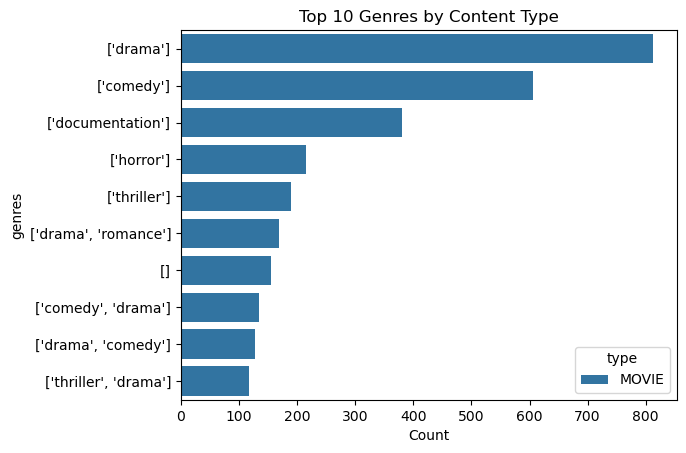

In [85]:
## 20. Genre Count by Content Type

genre_by_type = titles_df.explode('genres').groupby(['type', 'genres']).size().reset_index(name='Count')
genre_by_type = genre_by_type.sort_values(by='Count', ascending=False).head(10)

sns.barplot(x='Count', y='genres', hue='type', data=genre_by_type)
plt.title('Top 10 Genres by Content Type')
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart makes it easy to see how genre distribution differs across movies and TV shows, helping us assess content variety.

##### 2. What is/are the insight(s) found from the chart?

Some genres, like Drama and Comedy, are more prevalent in movies, while genres like Documentary and Reality TV are more common in shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Amazon can use this to ensure genre balance across content types. If TV shows are light on certain genres, they can commission more diverse series, or vice versa, to create a more well-rounded library that caters to varied audience tastes.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Amazon Prime’s content library is vast and diverse, but maximizing platform success requires strategic decisions rooted in data. After conducting an in-depth exploratory data analysis (EDA) across 20 key visualizations, we’ve uncovered valuable insights that can shape content strategy, improve viewer engagement, and boost platform growth. Below are the specific, actionable recommendations to help Amazon Prime achieve its business objectives.

## **1. Content Portfolio Optimization**

- **Expand High-Performing Genres:**
  - Invest more in popular genres like Drama, Comedy, and Thriller.
  - Experiment with hybrid genres (e.g., Comedy-Thriller, Sci-Fi Drama) to create unique content.

- **Fill Genre Gaps in TV Shows:**
  - Produce TV series in high-demand movie genres to attract long-term viewers.
  
- **Leverage Popular Directors and Actors:**
  - Secure exclusive deals with high-performing creators.
  - Promote content led by popular actors to capitalize on their existing fan base.

## **2. Quality and Ratings Strategy**

- **Aim for Higher IMDb and TMDB Scores:**
  - Prioritize longer, high-production-value content, as longer content tends to score higher.
  - Balance runtime carefully to avoid viewer fatigue.

- **Use External Ratings for Smart Recommendations:**
  - Refine recommendation algorithms to highlight highly rated or trending content.
  - Use rating trends to decide which content to promote or retire.

## **3. Viewer Retention and Engagement**

- **Capitalize on Short-Form Content for Casual Viewers:**
  - Produce more short films, mini-series, and episodic content.
  - Recommend shorter content to users with lower watch times to reduce churn.

- **Promote Highly Voted and Popular Titles:**
  - Feature hit titles more prominently in the app.
  - Create spin-offs or sequels for highly voted content.

## **4. International Expansion and Localization**

- **Target Underrepresented Markets:**
  - Expand the international library with high-performing foreign content.
  - Produce regional originals to cater to diverse global audiences.

- **Localize High-Performing Content:**
  - Dub or subtitle top-rated content to make it accessible worldwide.
  - Use localized marketing strategies to promote adapted content.

## **5. Content Lifecycle Management**

- **Revive Low-Performing Content with Marketing Pushes:**
  - Repackage or rebrand hidden gems to give them renewed visibility.
  - Create curated playlists to resurface older, overlooked content.

- **Data-Driven Content Production Decisions:**
  - Use insights from score distributions, genre preferences, and runtime correlations to guide production.
  - Test pilot episodes with different formats, and use early viewer feedback to decide on full production.

## **Final Thought: Balancing Art and Analytics**

- **Strategic Content Creation:**
  - Blend data-driven insights with creative vision to produce engaging, high-quality content.
  - Foster innovation while aligning with market trends to stay competitive.

By implementing these strategies, Amazon Prime can optimize its content strategy, deepen viewer satisfaction, and maintain a competitive edge in the dynamic streaming landscape. Let me know if you’d like me to refine anything or add more detail! 🚀

# **Conclusion**

# Final Conclusion: Transforming Amazon Prime with Data-Driven Insights

After conducting an in-depth exploratory data analysis (EDA) of Amazon Prime’s content library, we’ve uncovered key patterns, trends, and opportunities that can drive the platform’s success. This project has provided a comprehensive understanding of content distribution, viewer preferences, ratings dynamics, and production trends. The insights gained empower Amazon Prime to make data-backed decisions, optimize content strategies, and strengthen viewer engagement. Let’s summarize the most impactful findings and how they shape the future of the platform.

## **1. Content Strategy and Genre Focus**

- **Dominant Genres and Untapped Potential:**
  Drama, Comedy, and Thriller emerged as the most popular genres. While this validates Amazon’s current content strategy, it also highlights the opportunity to diversify offerings. Exploring hybrid genres or expanding content in underrepresented categories (e.g., Sci-Fi, Fantasy) can help capture new audiences.

- **Balancing TV Shows and Movies:**
  The platform leans more toward movies, but the growing preference for binge-worthy TV series suggests room for more long-form content. Amazon can balance its library by producing more high-quality series in top-performing genres.

## **2. Quality and Viewer Satisfaction**

- **Leveraging Rating Dynamics:**
  The correlation between runtime and higher scores suggests that viewers appreciate in-depth, well-developed content. However, extremely long content can backfire. Amazon can experiment with “sweet-spot” runtimes that maximize engagement without overwhelming viewers.

- **Smart Use of External Scores:**
  The alignment between IMDb and TMDB scores reinforces the value of external ratings. Amazon can fine-tune its recommendation engine, promoting high-rated titles while also surfacing hidden gems that might not have received mainstream attention.

## **3. Viewer Retention and Personalization**

- **Short-Form Content for Casual Viewers:**
  Runtime distribution shows a demand for shorter content. Amazon can create more mini-series, short films, and episodic content to cater to users with shorter attention spans, reducing churn.

- **Highlighting Top-Rated and Popular Content:**
  The vote and popularity distributions show that a small percentage of content drives most engagement. Amazon can spotlight these hits, promote similar content, or create spin-offs to sustain interest.

## **4. Global Growth and Localization**

- **Expanding Global Content Offerings:**
  While U.S. content dominates, international titles contribute valuable diversity. Amazon can capitalize on this by licensing or producing more foreign-language content, catering to regional tastes and expanding its global footprint.

- **Localization as a Growth Lever:**
  Dubbing or subtitling top-rated content makes it accessible to non-English speakers, allowing Amazon to scale globally without always producing new content from scratch.

## **5. Future-Proofing Content Production**

- **Data-Driven Production Choices:**
  Insights into score distributions, genre preferences, and runtime dynamics provide a blueprint for smarter production. Amazon can test different content formats, gather early feedback, and refine productions to align with audience preferences.

- **Long-Term Creator Collaborations:**
  Identifying high-performing directors and actors opens the door for strategic partnerships. Amazon can build long-term relationships with proven creators, fostering exclusive content that attracts loyal viewers.

## **The Road Ahead: Sustaining Competitive Advantage**

Amazon Prime operates in a fiercely competitive streaming landscape. The ability to harness and act on data is a powerful differentiator. By continuously analyzing content performance, staying responsive to viewer preferences, and iterating on successful content models, Amazon can solidify its position as a market leader.

This project has demonstrated that EDA is not just about understanding historical data but about shaping future decisions. Amazon Prime now holds the insights needed to evolve its platform, delight viewers, and drive sustained growth. By balancing art with analytics, Amazon can confidently navigate the dynamic streaming world and continue to captivate audiences worldwide.